In [1]:
DataDir <- '/home/kate/Research/Property/Data/'

In [2]:
testing_dataset <- read.csv(paste(DataDir,"property_wcf_testing.csv", sep = ""), header=TRUE)

In [3]:
WeightedLorentz <- function(act, pred, weights) {
  df = data.frame(act = act, weights = weights, pred = pred) 
  df <- df[order(df$pred),] 
  df$random = cumsum((df$weights/sum(df$weights))) 
  df$totalPositive <- sum(df$act * df$weights) 
  df$cumPosFound <- cumsum(df$act * df$weights) 
  df$Lorentz <- df$cumPosFound / df$totalPositive 
  df$cumul_weight <- cumsum(df$weights)/max(cumsum(df$weights))
  return(df) 
}

In [4]:
testing <- testing_dataset

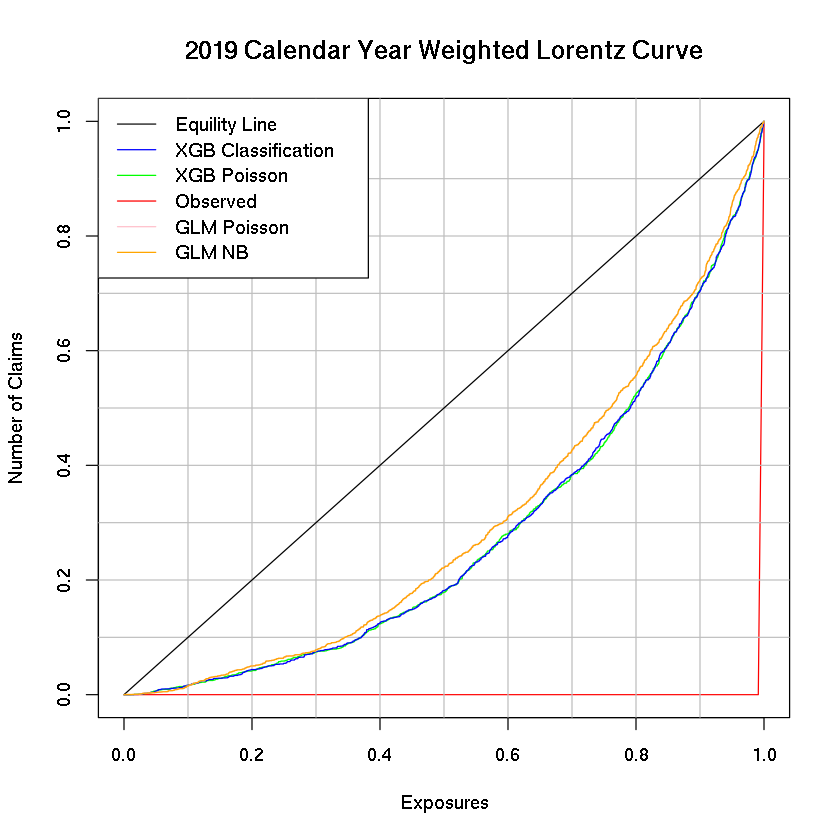

In [5]:
#Final curves
Observed <- WeightedLorentz(testing$cova_ic_nc_water,testing$cova_ic_nc_water,testing$ecy)
plot(Observed$cumul_weight, Observed$Lorentz, col="red", type="l",xlab="Exposures", ylab="Number of Claims")
abline(h=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9), v=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),col="grey")
lines(x = c(0,1), y = c(0,1),col="black")
#XGB Poisson
XGB_Poisson <- WeightedLorentz(testing$cova_ic_nc_water, testing$poisson_f_ecy_cv_xgb,testing$ecy)
lines(XGB_Poisson$cumul_weight, XGB_Poisson$Lorentz,col="green")
#XGB Class
XGB_Class <- WeightedLorentz(testing$cova_ic_nc_water, testing$class_f_ecy_cv_xgb,testing$ecy)
lines(XGB_Class$cumul_weight, XGB_Class$Lorentz,col="blue")
#Poisson GLM
GLM_Poisson <- WeightedLorentz(testing$cova_ic_nc_water, testing$poissonglm_f_ecy_cv,testing$ecy)
lines(GLM_Poisson$cumul_weight, GLM_Poisson$Lorentz,col="pink")
#NB GLM
NB_Poisson <- WeightedLorentz(testing$cova_ic_nc_water, testing$nbglm_f_ecy_cv,testing$ecy)
lines(NB_Poisson$cumul_weight, NB_Poisson$Lorentz,col="orange")

title('2019 Calendar Year Weighted Lorentz Curve')
legend("topleft", c('Equility Line', 'XGB Classification','XGB Poisson','Observed','GLM Poisson','GLM NB'), col = c('black','blue','green','red','pink','orange'), lty = 1, box.col = 1)